###### Dataset **TITANIC** intership program

In [96]:
from skimage import io
import matplotlib.pyplot as plt


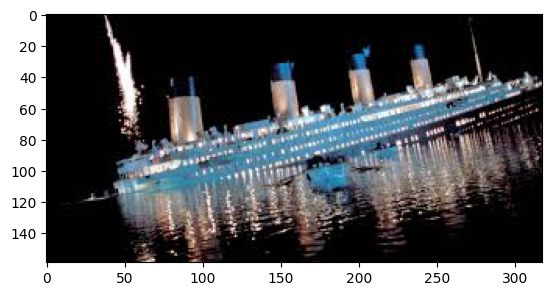

In [97]:
photo = io.imread('titanic.jpeg')
plt.imshow(photo)
plt.show()

# Importation de données

In [178]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [207]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv']), sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analyse et visualisation de données

In [181]:
df.shape

(891, 12)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Visualisation de données independand

#### Variable categoriel

In [208]:
col = df.select_dtypes(include=['object']).columns
col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [209]:
for i in col:
  print()
  print('effectif par rapport a', i)
  print(df[i].value_counts())


effectif par rapport a Name
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

effectif par rapport a Sex
Sex
male      577
female    314
Name: count, dtype: int64

effectif par rapport a Ticket
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

effectif par rapport a Cabin
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3


#### 1. Traitement de données categoriel

In [210]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [211]:
df['Cabin'] = df['Cabin'].str[0]
df['Cabin'].value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [212]:
col_name = ['Sex', 'Cabin', 'Embarked']
data = df[col_name]
data.head()

,Sex,Cabin,Embarked
0,male,NaN,S
1,female,C,C
2,female,NaN,S
3,female,C,S
4,male,NaN,S



-----------------------------------------------------------------------



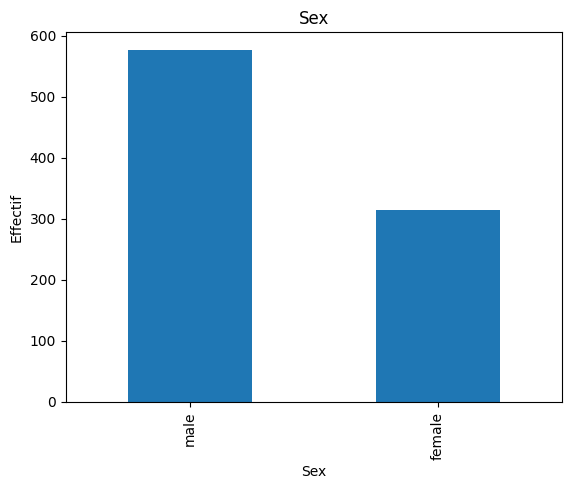


-----------------------------------------------------------------------



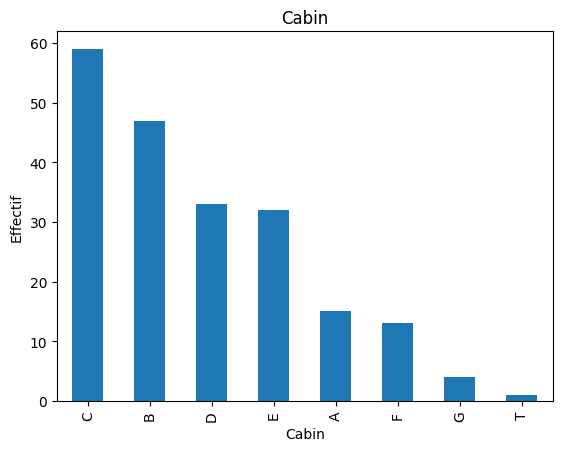


-----------------------------------------------------------------------



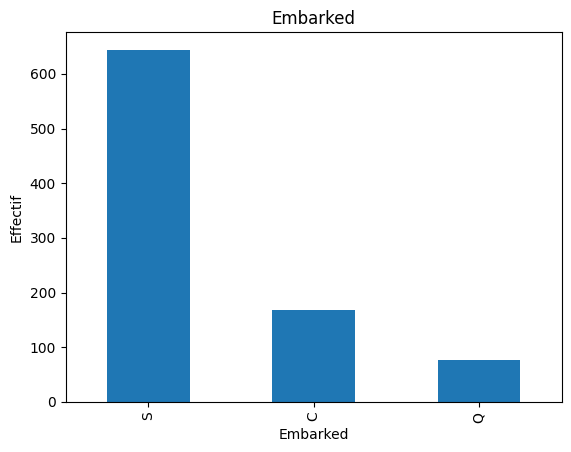

In [213]:
for i in col_name:
  fig = plt.figure()
  data[i].value_counts().plot(kind='bar')
  plt.title(i)
  print()
  print('-----------------------------------------------------------------------')
  print()
  plt.ylabel('Effectif')
  plt.show()

In [214]:
for i in col:
  frequence = df[i].value_counts()
  porcentage = round((frequence / len(df))*100, 2)
  print()
  print('Pourcentage par rapport aux', i)
  print(porcentage)


Pourcentage par rapport aux Name
Name
Braund, Mr. Owen Harris                     0.11
Boulos, Mr. Hanna                           0.11
Frolicher-Stehli, Mr. Maxmillian            0.11
Gilinski, Mr. Eliezer                       0.11
Murdlin, Mr. Joseph                         0.11
                                            ... 
Kelly, Miss. Anna Katherine "Annie Kate"    0.11
McCoy, Mr. Bernard                          0.11
Johnson, Mr. William Cahoone Jr             0.11
Keane, Miss. Nora A                         0.11
Dooley, Mr. Patrick                         0.11
Name: count, Length: 891, dtype: float64

Pourcentage par rapport aux Sex
Sex
male      64.76
female    35.24
Name: count, dtype: float64

Pourcentage par rapport aux Ticket
Ticket
347082      0.79
CA. 2343    0.79
1601        0.79
3101295     0.67
CA 2144     0.67
            ... 
9234        0.11
19988       0.11
2693        0.11
PC 17612    0.11
370376      0.11
Name: count, Length: 681, dtype: float64

Pourcentage 


-----------------------------------------------------------------------
 Diagramme circulaire de  Sex



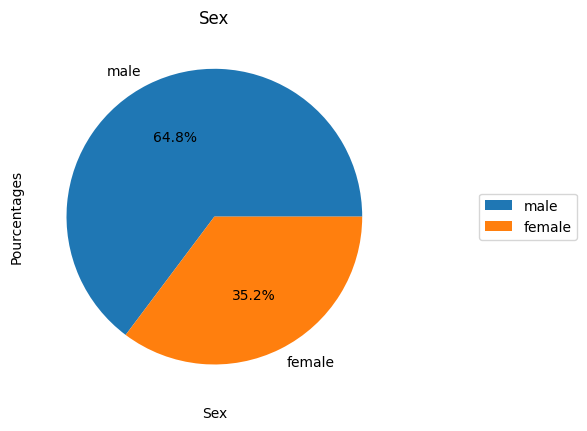


-----------------------------------------------------------------------
 Diagramme circulaire de  Cabin



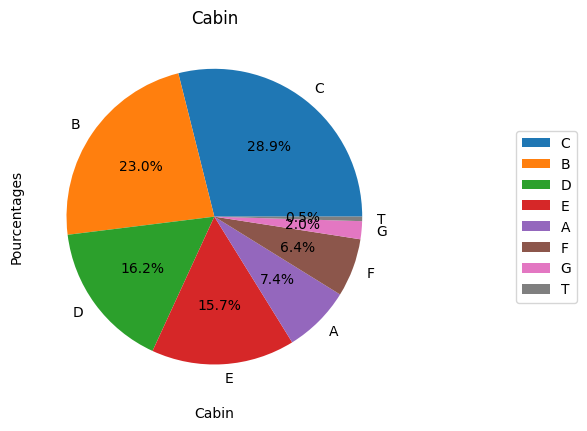


-----------------------------------------------------------------------
 Diagramme circulaire de  Embarked



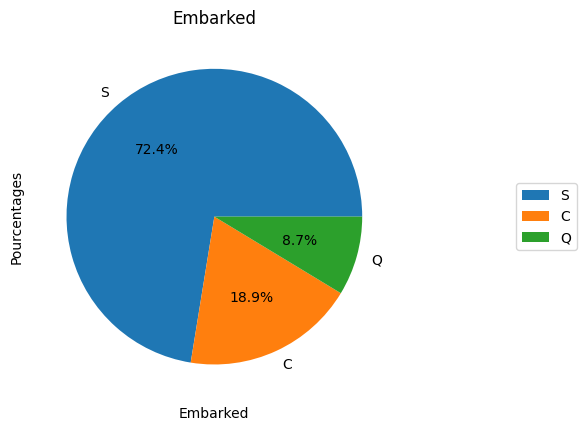

In [221]:
for i in col_name:
  fig = plt.figure()
  df[i].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
  plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5))
  plt.ylabel('Pourcentages')
  plt.xlabel(i)
  print()
  print('-----------------------------------------------------------------------')
  print(' Diagramme circulaire de ', i)
  print()
  plt.title(i)
  plt.show()

#### Variable numerique

In [224]:
col_num = df.select_dtypes(include=['float64', 'int']).columns
col_num = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
col_num

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


-----------------------------------------------------------------------
Diagramme de la variable Survived



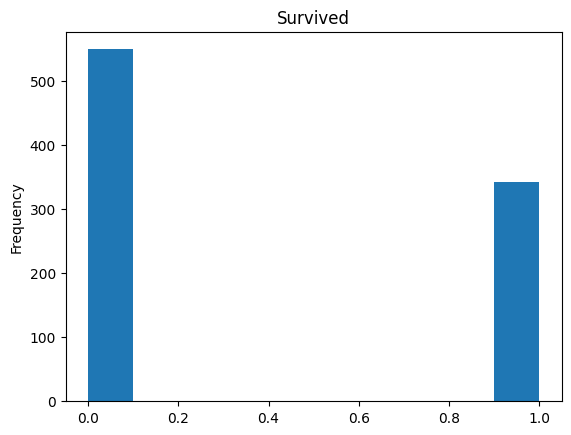


-----------------------------------------------------------------------
Diagramme de la variable Pclass



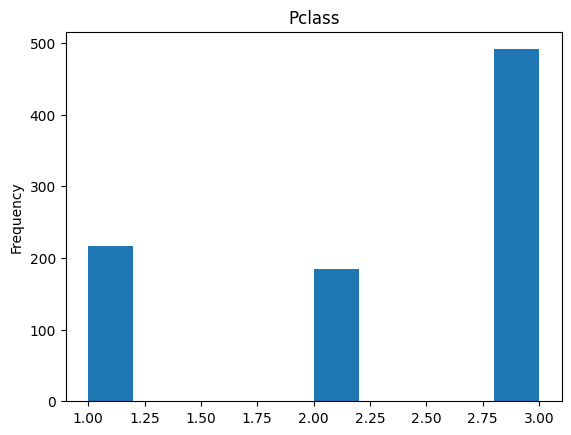


-----------------------------------------------------------------------
Diagramme de la variable Age



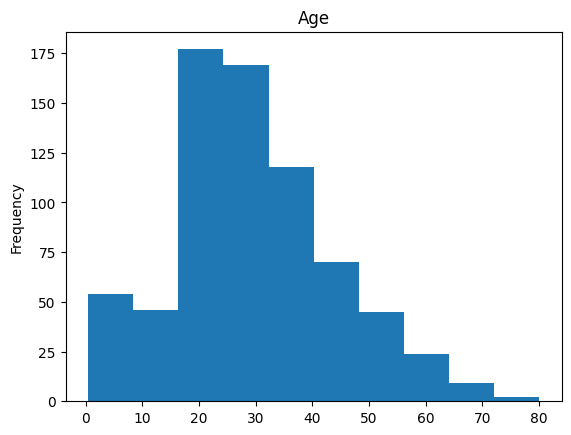


-----------------------------------------------------------------------
Diagramme de la variable SibSp



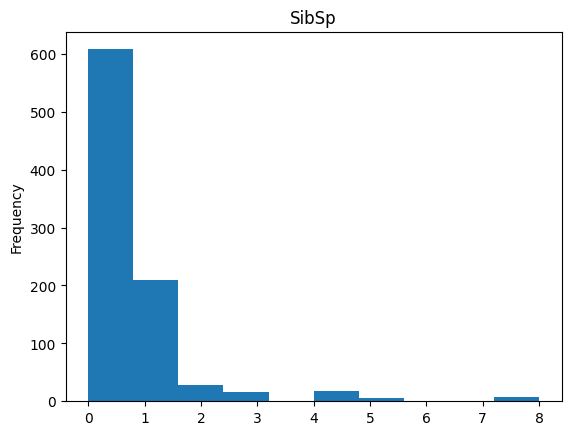


-----------------------------------------------------------------------
Diagramme de la variable Parch



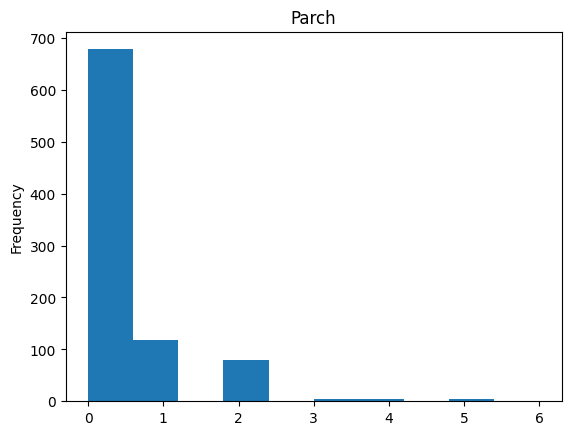


-----------------------------------------------------------------------
Diagramme de la variable Fare



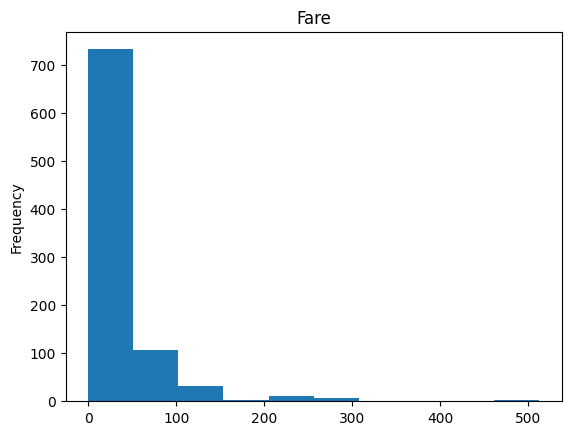

In [242]:
for i in col_num:
  fig = plt.figure()
  df[i].plot(kind='hist')
  print()
  print('-----------------------------------------------------------------------')
  print('Diagramme de la variable', i)
  print()
  plt.title(i)
  plt.show()


-----------------------------------------------------------------------
Boxplot de la variable Survived



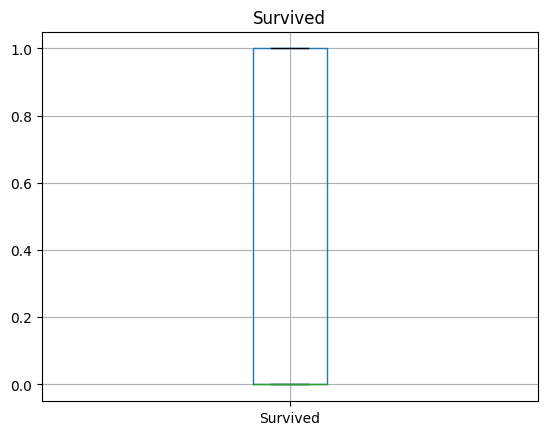


-----------------------------------------------------------------------
Boxplot de la variable Pclass



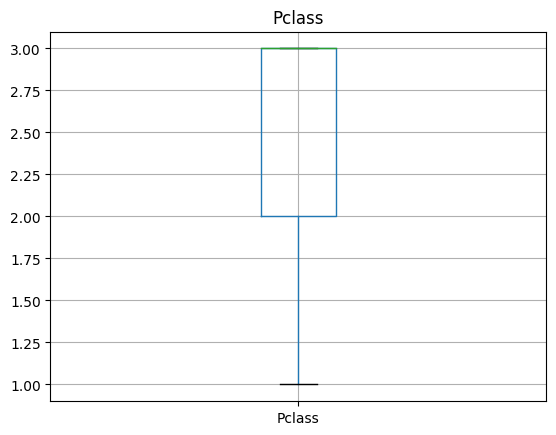


-----------------------------------------------------------------------
Boxplot de la variable Age



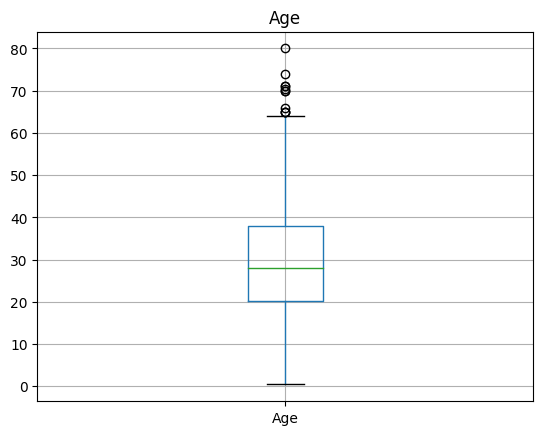


-----------------------------------------------------------------------
Boxplot de la variable SibSp



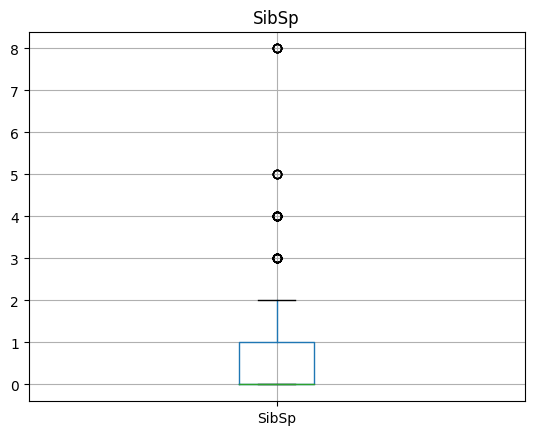


-----------------------------------------------------------------------
Boxplot de la variable Parch



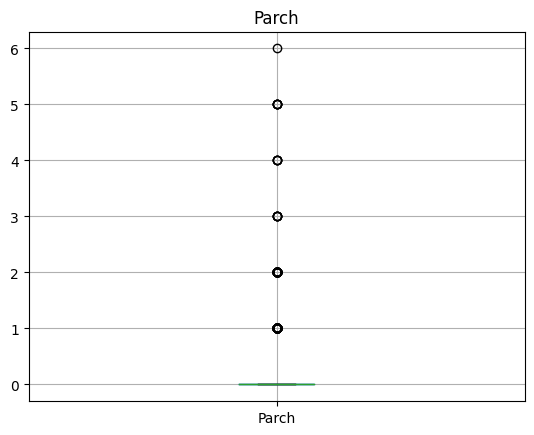


-----------------------------------------------------------------------
Boxplot de la variable Fare



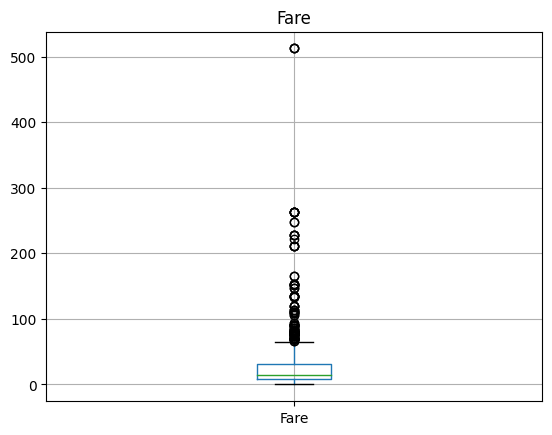

In [229]:
for i in col_num:
  fig = plt.figure()
  df.boxplot(column=i)
  print()
  print('-----------------------------------------------------------------------')
  print('Boxplot de la variable', i)
  print()
  plt.title(i)
  plt.show()

# Analyse et visualisation de données par rapport a la variable sible **Survived**


In [230]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
import seaborn as sns

#### Variable categoriel

In [231]:
col_name = ['Survived','Sex', 'Cabin', 'Embarked']
data = df[col_name]
data.head()

,Survived,Sex,Cabin,Embarked
0,0,male,NaN,S
1,1,female,C,C
2,1,female,NaN,S
3,1,female,C,S
4,0,male,NaN,S


In [243]:
for i in col_name:
  effectif = data.groupby(i)['Survived']
  print()
  print
  print('-----------------------------------------------------------------------')
  print()
  print('les effectif des survivant par rapport aux ', i)
  print(effectif.value_counts())


-----------------------------------------------------------------------

les effectif des survivant par rapport aux  Survived
Survived
0    549
1    342
Name: count, dtype: int64

-----------------------------------------------------------------------

les effectif des survivant par rapport aux  Sex
Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

-----------------------------------------------------------------------

les effectif des survivant par rapport aux  Cabin
Cabin  Survived
A      0            8
       1            7
B      1           35
       0           12
C      1           35
       0           24
D      1           25
       0            8
E      1           24
       0            8
F      1            8
       0            5
G      0            2
       1            2
T      0            1
Name: count, dtype: int64

--------------------------------------------------------------


-----------------------------------------------------------------------
Diagramme de la variable Survived par rapport a la variable Survivant.



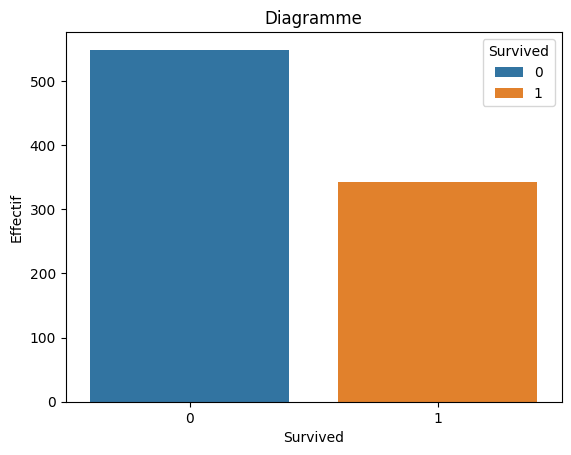


-----------------------------------------------------------------------
Diagramme de la variable Sex par rapport a la variable Survivant.



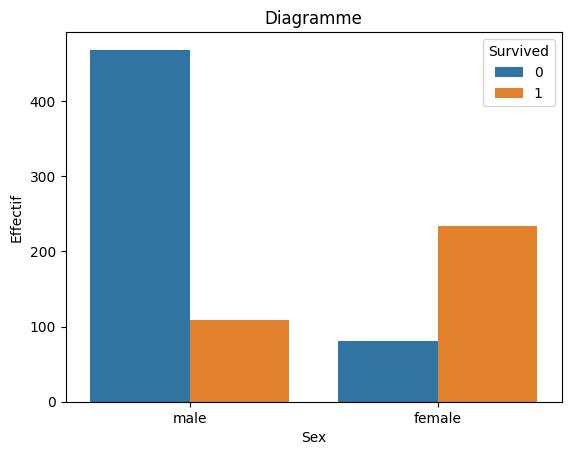


-----------------------------------------------------------------------
Diagramme de la variable Cabin par rapport a la variable Survivant.



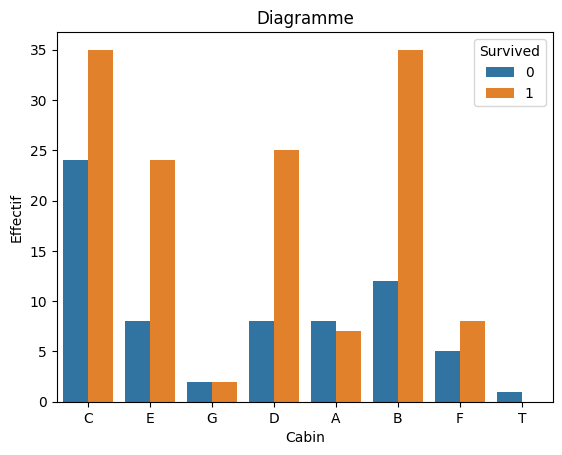


-----------------------------------------------------------------------
Diagramme de la variable Embarked par rapport a la variable Survivant.



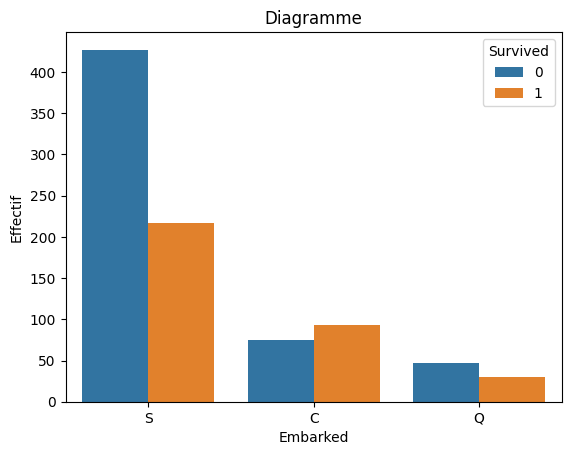

In [244]:
for i in col_name:
  sns.countplot(x=i, hue='Survived', data=data)
  plt.title('Diagramme')
  print()
  print('-----------------------------------------------------------------------')
  print('Diagramme de la variable', i, 'par rapport a la variable Survivant.')
  print()
  plt.ylabel('Effectif')
  plt.show()

In [245]:
for i in col:
  frequence = df.groupby(i)['Survived'].value_counts()  # Count occurrences within groups
  pourcentage = round((frequence / len(df))*100, 2)  # Calculate percentage within each group
  print()
  print('-----------------------------------------------------------------------')
  print()
  print('Diagramme de la variable', i, 'par rapport a la variable Survivant.')
  print()
  print(pourcentage)


-----------------------------------------------------------------------

Diagramme de la variable Name par rapport a la variable Survivant.

Name                                   Survived
Abbing, Mr. Anthony                    0           0.11
Abbott, Mr. Rossmore Edward            0           0.11
Abbott, Mrs. Stanton (Rosa Hunt)       1           0.11
Abelson, Mr. Samuel                    0           0.11
Abelson, Mrs. Samuel (Hannah Wizosky)  1           0.11
                                                   ... 
de Mulder, Mr. Theodore                1           0.11
de Pelsmaeker, Mr. Alfons              0           0.11
del Carlo, Mr. Sebastiano              0           0.11
van Billiard, Mr. Austin Blyler        0           0.11
van Melkebeke, Mr. Philemon            0           0.11
Name: count, Length: 891, dtype: float64

-----------------------------------------------------------------------

Diagramme de la variable Sex par rapport a la variable Survivant.

Sex     Surv


-----------------------------------------------------------------------

les pourcentages des survivant par rapport aux  Survived


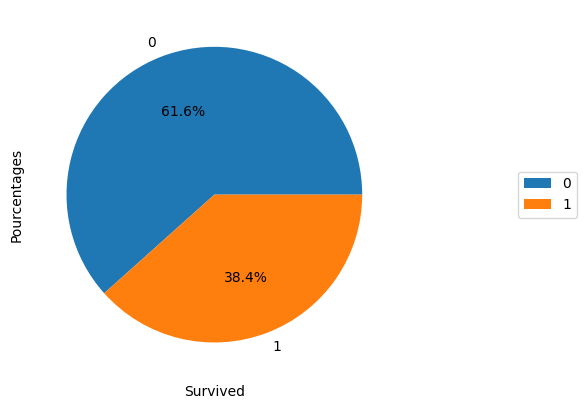


-----------------------------------------------------------------------

les pourcentages des survivant par rapport aux  Sex


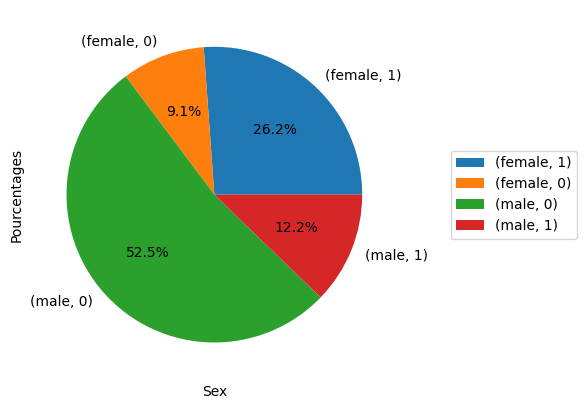


-----------------------------------------------------------------------

les pourcentages des survivant par rapport aux  Cabin


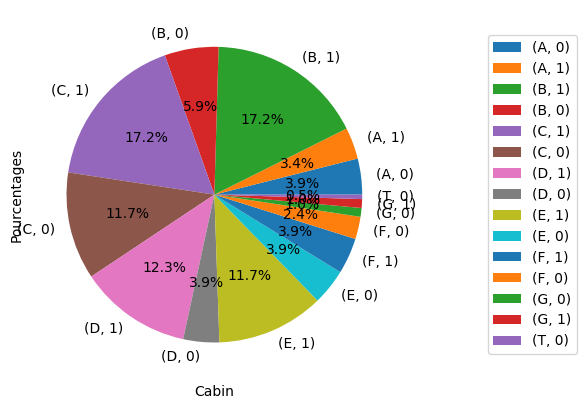


-----------------------------------------------------------------------

les pourcentages des survivant par rapport aux  Embarked


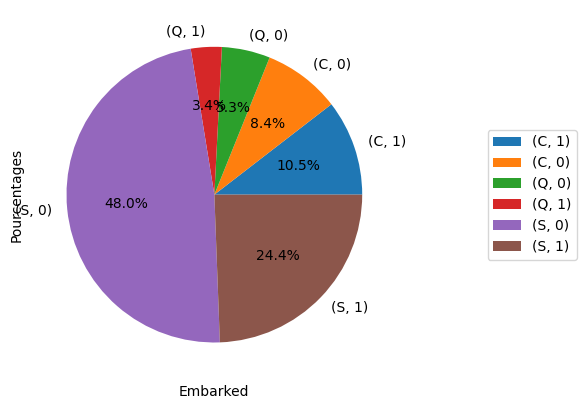

In [246]:
for i in col_name:
  frequence = df.groupby(i)['Survived'].value_counts()  # Count occurrences within groups
  pourcentage = round((frequence / len(df))*100, 2)
  fig = plt.figure()
  pourcentage.plot(kind='pie', autopct='%1.1f%%')
  plt.ylabel('Pourcentages')
  plt.xlabel(i)
  print()
  print('-----------------------------------------------------------------------')
  print()
  plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5))
  print('les pourcentages des survivant par rapport aux ', i)
  plt.show()

#### Variable numerique


In [247]:
df[col_num].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



-----------------------------------------------------------------------
Diagramme de la variable Survived par rapport a la variable Survivant.



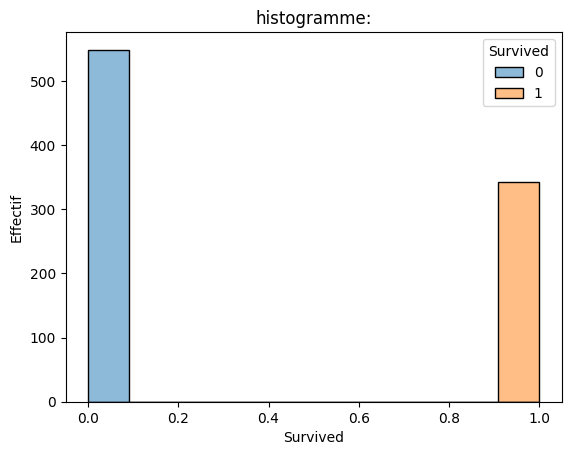


-----------------------------------------------------------------------
Diagramme de la variable Pclass par rapport a la variable Survivant.



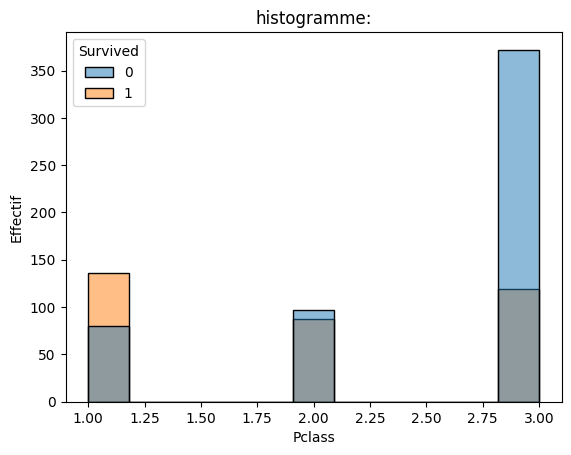


-----------------------------------------------------------------------
Diagramme de la variable Age par rapport a la variable Survivant.



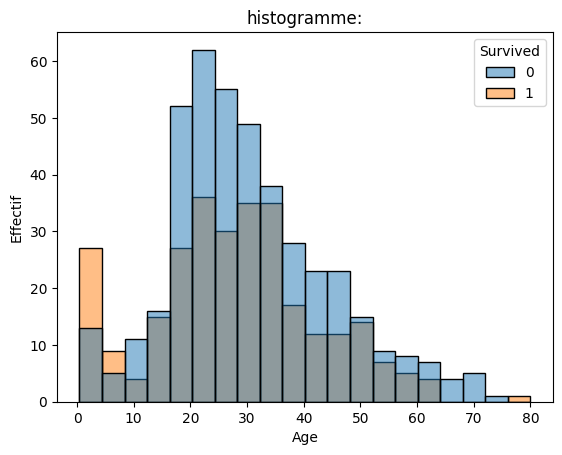


-----------------------------------------------------------------------
Diagramme de la variable SibSp par rapport a la variable Survivant.



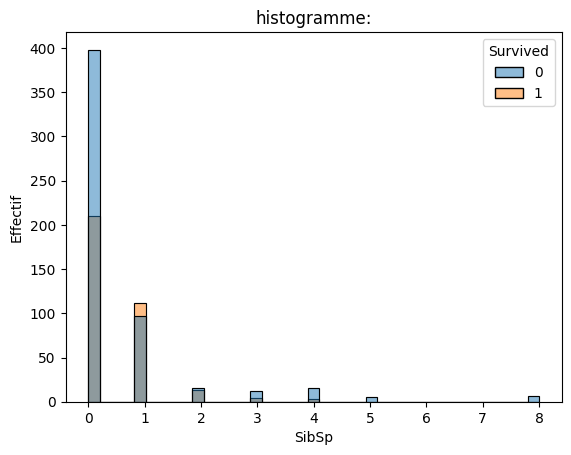


-----------------------------------------------------------------------
Diagramme de la variable Parch par rapport a la variable Survivant.



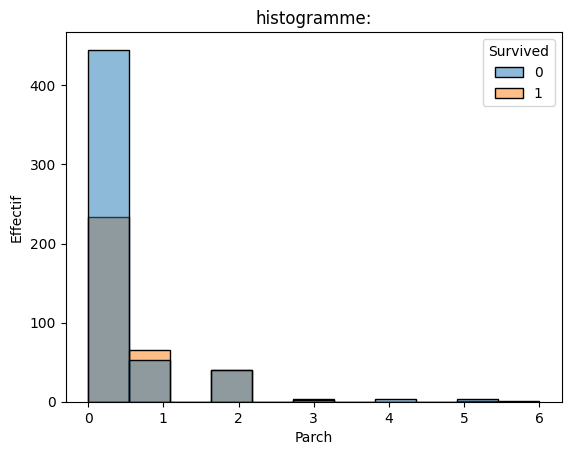


-----------------------------------------------------------------------
Diagramme de la variable Fare par rapport a la variable Survivant.



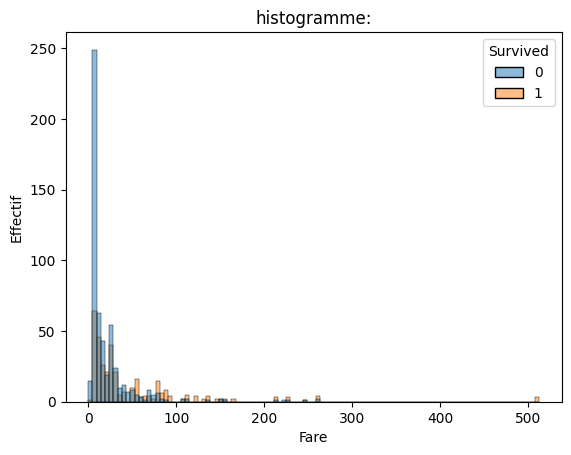

In [249]:
col_num = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for i in col_num:
  sns.histplot(x=i, hue='Survived', data=df)
  print()
  print('-----------------------------------------------------------------------')

  print('Diagramme de la variable', i, 'par rapport a la variable Survivant.')
  print()
  plt.title('histogramme:')
  plt.ylabel('Effectif')
  plt.show()


-----------------------------------------------------------------------
Boxplot de la variable Survived par rapport a la variable Survivant.



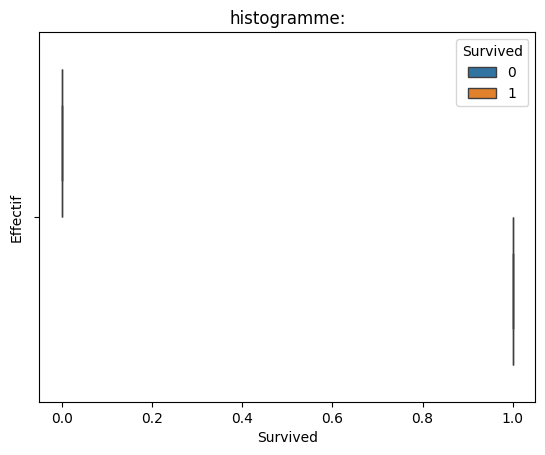


-----------------------------------------------------------------------
Boxplot de la variable Age par rapport a la variable Survivant.



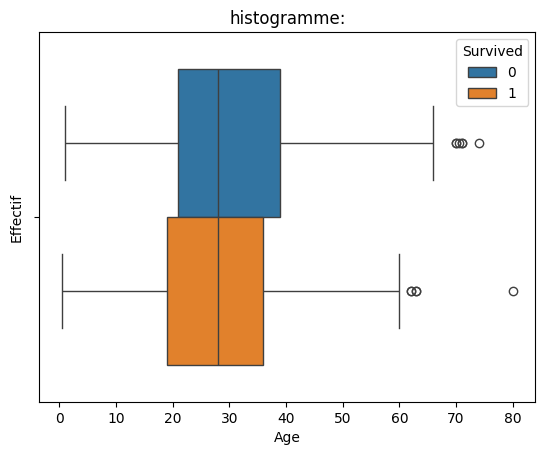


-----------------------------------------------------------------------
Boxplot de la variable Fare par rapport a la variable Survivant.



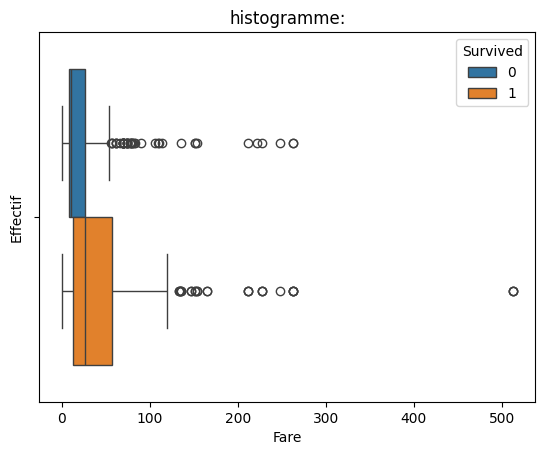

In [252]:
col_num = ['Survived',  'Age',  'Fare']
for i in col_num:
  sns.boxplot(x=i, hue='Survived', data=df)
  print()
  print('-----------------------------------------------------------------------')
  print('Boxplot de la variable', i, 'par rapport a la variable Survivant.')
  print()
  plt.title('histogramme:')
  plt.ylabel('Effectif')
  plt.show()

# Traitement des valeurs manquante

In [253]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [259]:
df.shape

(891, 12)

In [255]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [256]:
col_null = ['Age', 'Cabin', 'Embarked']
data_null = df[col_null]
data_null.head()

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C,C
2,26.0,NaN,S
3,35.0,C,S
4,35.0,NaN,S


Les Valeurs null dans notre données


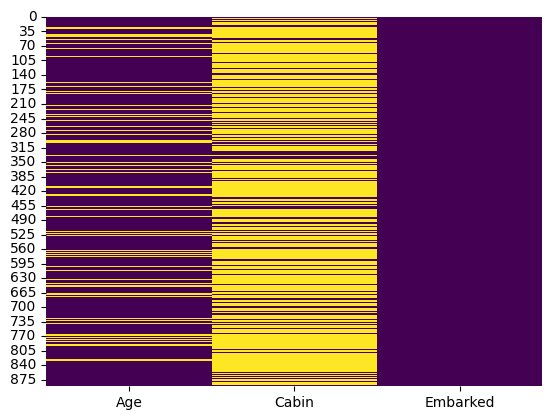

In [258]:
sns.heatmap(data_null.isnull(), cbar=False, cmap='viridis'),
print('Les Valeurs null dans notre données')
plt.show()

In [261]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [267]:
df.Age = df.groupby('Survived')['Age'].transform(lambda x: x.fillna(x.mean()))
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [266]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [268]:
df.Cabin = df.groupby('Survived')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [269]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S


In [291]:
find= ['Survived', 'Pclass', 'Sex', 'Age',
       'Cabin', 'Embarked']

In [292]:
data_tinic = df[find]
data_tinic.head()

,Survived,Pclass,Sex,Age,Cabin,Embarked
0,0,3,male,22.0,C,S
1,1,1,female,38.0,C,C
2,1,3,female,26.0,B,S
3,1,1,female,35.0,C,S
4,0,3,male,35.0,C,S


# Traitement des données finale

In [272]:
data_tinic.shape

(891, 6)

In [296]:
data_tinic[['Q', 'S']] = pd.get_dummies(data_tinic['Embarked'], drop_first=True).astype(int)
data_tinic.head()

<ipython-input-296-fed593497824>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tinic[['Q', 'S']] = pd.get_dummies(data_tinic['Embarked'], drop_first=True).astype(int)


,Survived,Pclass,Sex,Age,Cabin,Embarked,Q,S
0,0,3,male,22.0,C,S,0,1
1,1,1,female,38.0,C,C,0,0
2,1,3,female,26.0,B,S,0,1
3,1,1,female,35.0,C,S,0,1
4,0,3,male,35.0,C,S,0,1


In [298]:
data_tinic.Sex = data_tinic.Sex.map({'male':0, 'female':1})
data_tinic.head()

<ipython-input-298-bf026403e99f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tinic.Sex = data_tinic.Sex.map({'male':0, 'female':1})


,Survived,Pclass,Sex,Age,Cabin,Embarked,Q,S
0,0,3,0,22.0,C,S,0,1
1,1,1,1,38.0,C,C,0,0
2,1,3,1,26.0,B,S,0,1
3,1,1,1,35.0,C,S,0,1
4,0,3,0,35.0,C,S,0,1


In [299]:
data_tinic.drop('Embarked', axis=1, inplace=True)
data_tinic.head()

<ipython-input-299-de0364c35caa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tinic.drop('Embarked', axis=1, inplace=True)


,Survived,Pclass,Sex,Age,Cabin,Q,S
0,0,3,0,22.0,C,0,1
1,1,1,1,38.0,C,0,0
2,1,3,1,26.0,B,0,1
3,1,1,1,35.0,C,0,1
4,0,3,0,35.0,C,0,1


In [302]:
data_tinic.Cabin = data_tinic.Cabin.map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})

<ipython-input-302-d7ab9badbaa9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tinic.Cabin = data_tinic.Cabin.map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})


In [303]:
data_tinic.head()

,Survived,Pclass,Sex,Age,Cabin,Q,S
0,0,3,0,22.0,2,0,1
1,1,1,1,38.0,2,0,0
2,1,3,1,26.0,1,0,1
3,1,1,1,35.0,2,0,1
4,0,3,0,35.0,2,0,1


In [305]:
data_tinic.astype('int64')
data_tinic.head()

,Survived,Pclass,Sex,Age,Cabin,Q,S
0,0,3,0,22.0,2,0,1
1,1,1,1,38.0,2,0,0
2,1,3,1,26.0,1,0,1
3,1,1,1,35.0,2,0,1
4,0,3,0,35.0,2,0,1


In [308]:
data_tinic.describe()

,Survived,Pclass,Sex,Age,Cabin,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.736034,1.858586,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.014897,0.862569,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,30.000000,2.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,2.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,7.000000,1.000000,1.000000


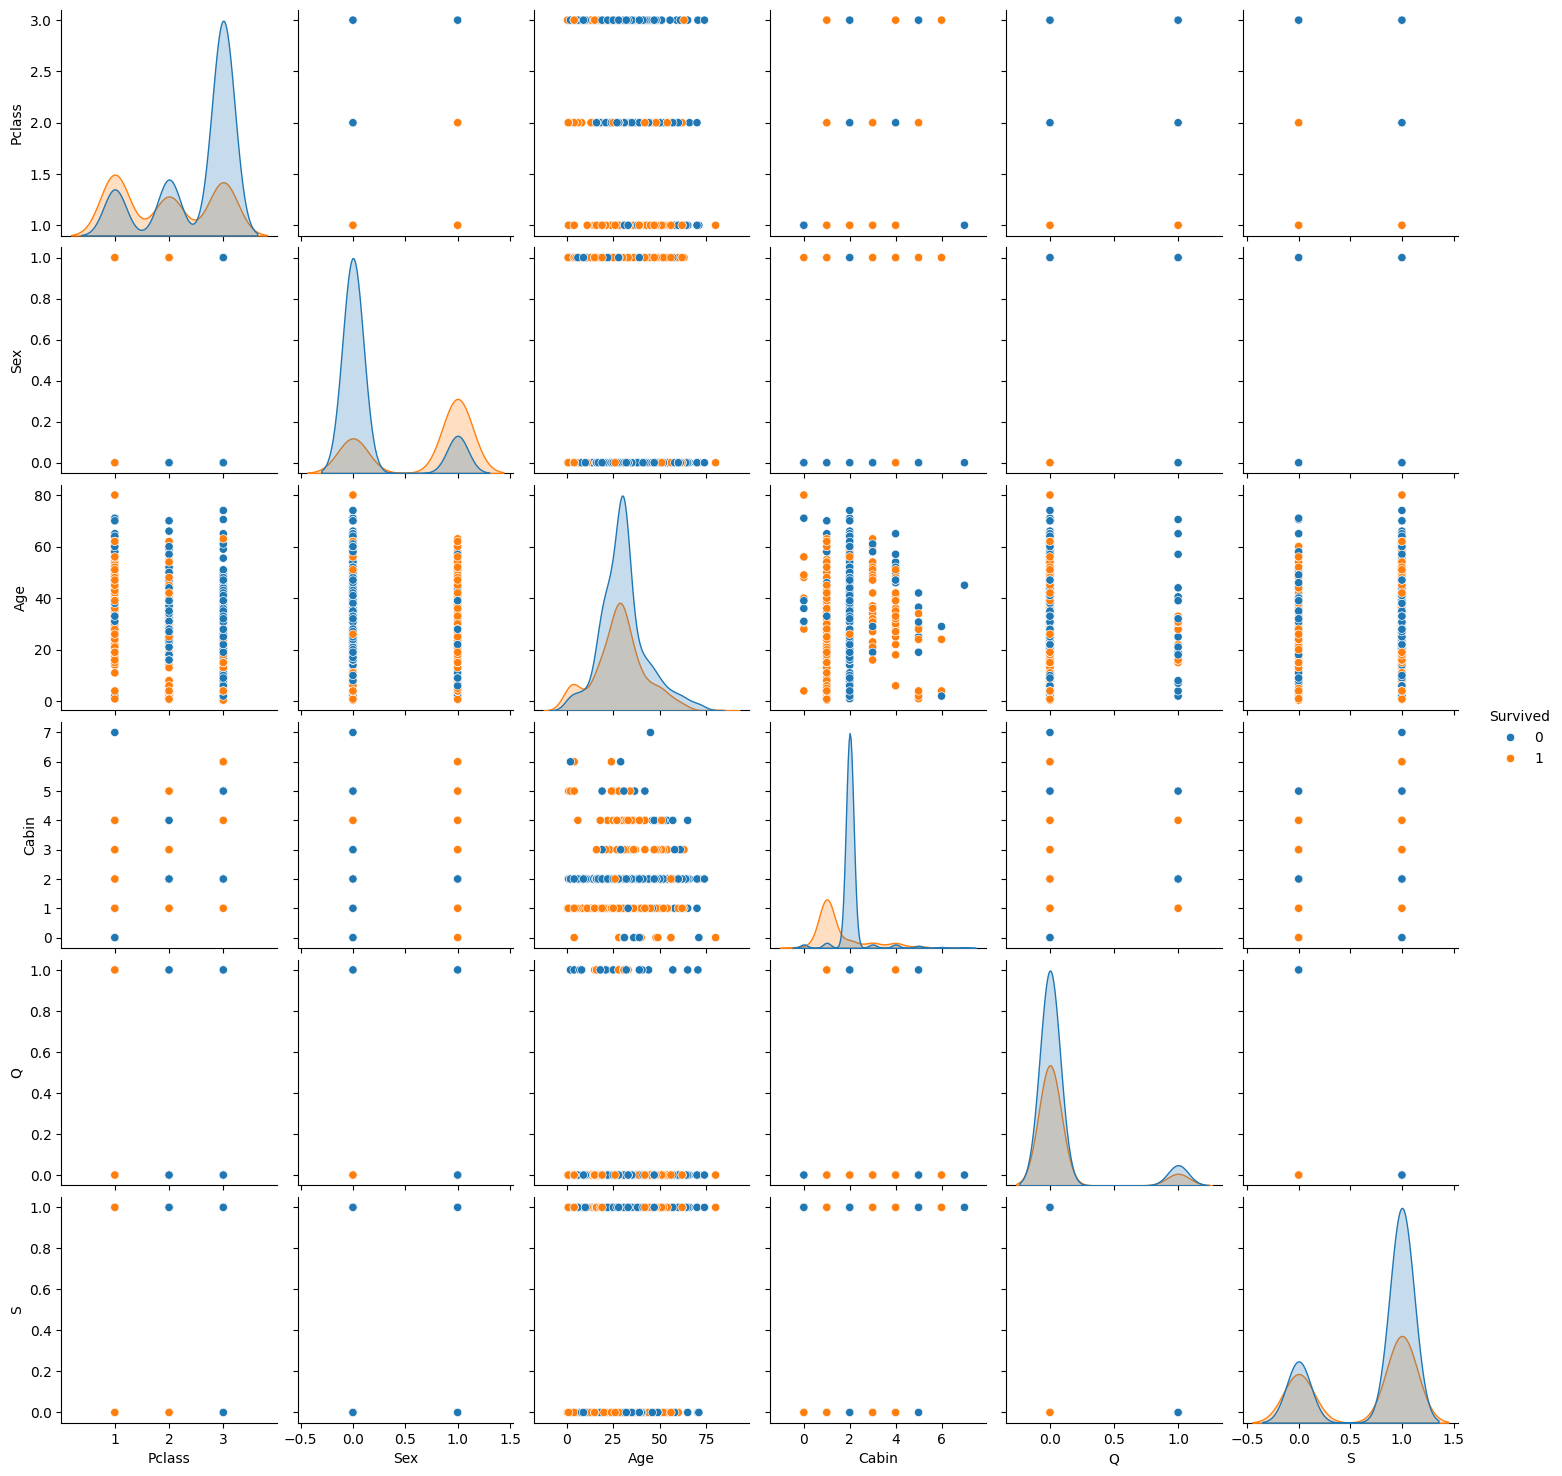

In [307]:
sns.pairplot(data_tinic, hue='Survived')
plt.show()

In [310]:
data_tinic.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Sex         0.543351
Age        -0.080453
Cabin      -0.272082
Q           0.003650
S          -0.149683
Name: Survived, dtype: float64

In [315]:
data_tinic.to_csv('data_titanic.csv')